In [ ]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew 
%matplotlib inline

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

In [ ]:
data = pd.read_csv("/content/Video_Games_Sales_as_at_22_Dec_2016.csv")

# Examine the data types of every variable

data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [ ]:
print(data.shape)

(16719, 16)


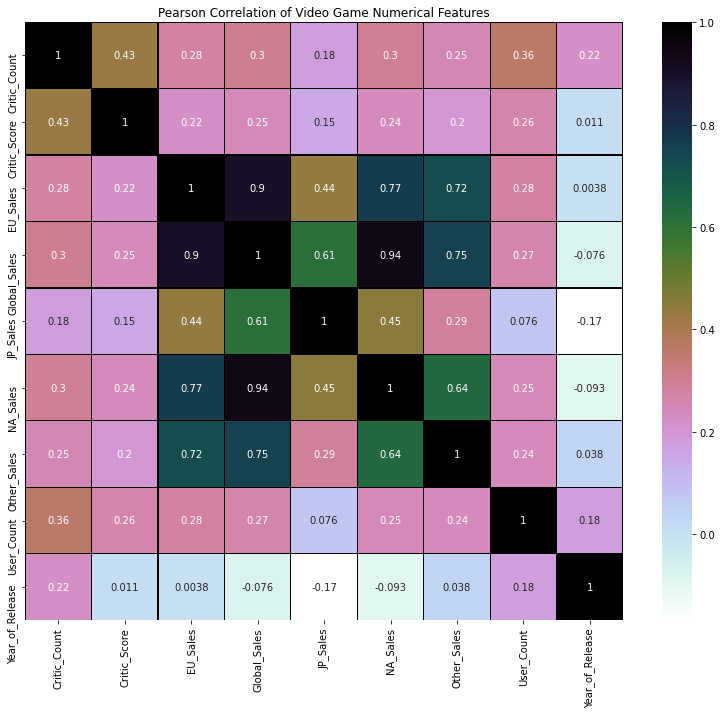

In [ ]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in data.iteritems():
    if type(colvalue[2]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = data.columns.difference(str_list) 
# Create Dataframe containing only numerical features
data_num = data[num_list]
f, ax = plt.subplots(figsize=(14, 11))
plt.title('Pearson Correlation of Video Game Numerical Features')
# Draw the heatmap using seaborn
sns.heatmap(data_num.astype(float).corr(),linewidths=0.25,vmax=1.0, 
            square=True, cmap="cubehelix_r", linecolor='k', annot=True)

In [ ]:
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

,Missing Ratio
User_Count,54.602548
Critic_Count,51.330821
Critic_Score,51.330821
Rating,40.486871
User_Score,40.098092
Developer,39.613613
Year_of_Release,1.608948
Publisher,0.322986
Genre,0.011962
Name,0.011962


BASIC PREPROCESSING

In [ ]:
data = data[(data['Platform'] == 'PS3') | (data['Platform'] == 'PS4') | (data['Platform'] == 'X360') | (data['Platform'] == 'XOne') | (data['Platform'] == 'Wii') | (data['Platform'] == 'WiiU') | (data['Platform'] == 'PC')]

#Let's double check the value counts to be sure
print(pd.value_counts(data["Platform"]))

#Let's see the shape of the data again
print(data.shape)

#Lets see the missing ratios again
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

PS3     1331
Wii     1320
X360    1262
PC       974
PS4      393
XOne     247
WiiU     147
Name: Platform, dtype: int64
(5674, 16)


,Missing Ratio
Critic_Count,37.486782
Critic_Score,37.486782
User_Count,34.578780
Rating,23.757490
User_Score,22.559041
Developer,21.713077
Year_of_Release,1.868171
Publisher,0.229115


In [ ]:

#filling all Nas with mean

data['Year_of_Release'] = data['Year_of_Release'].fillna(data['Year_of_Release'].mean())
data['Year_of_Release'] = data['Year_of_Release'].astype(int)
data['Critic_Count'] = data['Critic_Count'].fillna(data['Critic_Count'].mean())
data['Critic_Score'] = data['Critic_Score'].fillna(data['Critic_Score'].mean())



data['User_Score'] = data['User_Score'].replace('tbd', None)
data['User_Score'] = data['User_Score'].astype(float)
data['User_Score'] = data['User_Score'].fillna(data['User_Score'].mean())
data['User_Score'] = data['User_Score'].astype(int)
data['User_Count'] = data['User_Count'].fillna(data['User_Count'].mean())

data = data.dropna(subset=['Publisher','Developer','Rating'])


In [ ]:
print(data.shape) #pre-dummies shape
data = pd.get_dummies(data=data, columns=['Platform', 'Genre', 'Rating'])
print(data.shape) #post-dummies shape
data.head #Check to verify that dummies are ok

(4321, 16)
(4321, 39)


<bound method NDFrame.head of                                     Name  Year_of_Release  ... Rating_RP  Rating_T
0                             Wii Sports             2006  ...         0         0
2                         Mario Kart Wii             2008  ...         0         0
3                      Wii Sports Resort             2009  ...         0         0
7                               Wii Play             2006  ...         0         0
8              New Super Mario Bros. Wii             2009  ...         0         0
...                                  ...              ...  ...       ...       ...
16682                     End of Nations             2012  ...         0         1
16685                            Worms 2             1997  ...         0         0
16696  Metal Gear Solid V: Ground Zeroes             2014  ...         0         0
16700                             Breach             2011  ...         0         1
16706            STORM: Frontline Nation             2011

In [ ]:
data = data.drop(['Name', 'Publisher', 'Developer', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)


In [ ]:
X = data[['Year_of_Release', 'Critic_Score', 'Critic_Count',
       'User_Score', 'User_Count', 'Platform_PC', 'Platform_PS3',
       'Platform_PS4', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360',
       'Platform_XOne', 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting',
       'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing',
       'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation',
       'Genre_Sports', 'Genre_Strategy', 'Rating_E', 'Rating_E10+', 'Rating_M',
       'Rating_RP', 'Rating_T']]

Y = data[['Global_Sales']]

#Double checking the shape
print(X.shape)
print(Y.shape)

(4321, 29)
(4321, 1)


In [ ]:
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

,Missing Ratio


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

#Let's check the shape of the split data as a precaution
print("X_train shape: {}".format(X_train.shape))
print("Y_train shape: {}".format(Y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("Y_test shape: {}".format(Y_test.shape))

X_train shape: (3240, 29)
Y_train shape: (3240, 1)
X_test shape: (1081, 29)
Y_test shape: (1081, 1)


ABNORMAL DISTRIBUTION OF TARGET VALUE


 mu = 0.75 and sigma = 2.14



Text(0.5, 1.0, 'Global_Sales distribution')

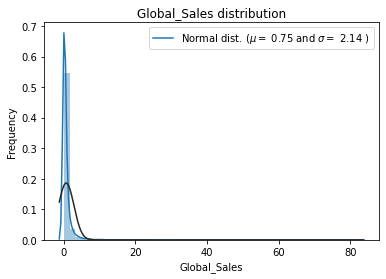

In [ ]:
sns.distplot(data['Global_Sales'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['Global_Sales'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Global_Sales distribution')


In [ ]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
Y_train = np.log1p(Y_train)
Y_test = np.log1p(Y_test)

In [ ]:
##LINEAR REGRESSION

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

#R2-SCORE
regr = LinearRegression()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))

R-squared = 0.3670
Root mean squared error = 0.3770


In [ ]:
##DecissionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

#R2-SCORE
regr = DecisionTreeRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))



R-squared = 0.1886
Root mean squared error = 0.4268


In [ ]:
##RIDGE
from sklearn.linear_model import Ridge


#R2-SCORE
regr = Ridge()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))

R-squared = 0.3671
Root mean squared error = 0.3770


In [ ]:
##SVR

from sklearn.svm import SVR


#R2-SCORE
regr = SVR()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))

R-squared = 0.1563
Root mean squared error = 0.4353


In [ ]:
##KNeighbors
from sklearn.neighbors import KNeighborsRegressor

#R2-SCORE
regr = KNeighborsRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))

R-squared = 0.2532
Root mean squared error = 0.4095


In [ ]:
##ADABoost
from sklearn.ensemble import AdaBoostRegressor

#R2-SCORE
regr = AdaBoostRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))


R-squared = 0.2180
Root mean squared error = 0.4190


In [ ]:
##GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor


#R2-SCORE
regr = GradientBoostingRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))

R-squared = 0.5466
Root mean squared error = 0.3191


In [ ]:

##RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#R2-SCORE
regr = RandomForestRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))




R-squared = 0.5761
Root mean squared error = 0.3085


USING DIFFERENT WAYS TO HANDLE MISSING VALUES AND ITS OBSERVATIONS A) Dropping Rows
B) Median, C) Mode

A

In [ ]:
data = pd.read_csv("/content/Video_Games_Sales_as_at_22_Dec_2016.csv")

In [ ]:
data = data[(data['Platform'] == 'PS3') | (data['Platform'] == 'PS4') | (data['Platform'] == 'X360') | (data['Platform'] == 'XOne') | (data['Platform'] == 'Wii') | (data['Platform'] == 'WiiU') | (data['Platform'] == 'PC')]

#Let's double check the value counts to be sure
print(pd.value_counts(data["Platform"]))

#Let's see the shape of the data again
print(data.shape)


#Lets see the missing ratios again
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

PS3     1331
Wii     1320
X360    1262
PC       974
PS4      393
XOne     247
WiiU     147
Name: Platform, dtype: int64
(5674, 16)


,Missing Ratio
Critic_Count,37.486782
Critic_Score,37.486782
User_Count,34.578780
Rating,23.757490
User_Score,22.559041
Developer,21.713077
Year_of_Release,1.868171
Publisher,0.229115


In [ ]:
data = data.dropna(axis=0)

In [ ]:
print(data.shape) #pre-dummies shape
data = pd.get_dummies(data=data, columns=['Platform', 'Genre', 'Rating'])
print(data.shape) #post-dummies shape
data.head #Check to verify that dummies are ok

(3244, 16)
(3244, 37)


<bound method NDFrame.head of                                     Name  Year_of_Release  ... Rating_RP  Rating_T
0                             Wii Sports           2006.0  ...         0         0
2                         Mario Kart Wii           2008.0  ...         0         0
3                      Wii Sports Resort           2009.0  ...         0         0
7                               Wii Play           2006.0  ...         0         0
8              New Super Mario Bros. Wii           2009.0  ...         0         0
...                                  ...              ...  ...       ...       ...
16644                    Hospital Tycoon           2007.0  ...         0         0
16656                   Fast Racing Neo            2016.0  ...         0         0
16696  Metal Gear Solid V: Ground Zeroes           2014.0  ...         0         0
16700                             Breach           2011.0  ...         0         1
16706            STORM: Frontline Nation           2011.0

In [ ]:
data = data.drop(['Name', 'Publisher', 'Developer', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)


In [ ]:
X = data[['Year_of_Release', 'Critic_Score', 'Critic_Count',
       'User_Score', 'User_Count', 'Platform_PC', 'Platform_PS3',
       'Platform_PS4', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360',
       'Platform_XOne', 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting',
       'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing',
       'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation',
       'Genre_Sports', 'Genre_Strategy', 'Rating_E', 'Rating_E10+', 'Rating_M',
       'Rating_RP', 'Rating_T']]

Y = data[['Global_Sales']]

#Double checking the shape
print(X.shape)
print(Y.shape)

(3244, 29)
(3244, 1)


In [ ]:
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

,Missing Ratio


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

#Let's check the shape of the split data as a precaution
print("X_train shape: {}".format(X_train.shape))
print("Y_train shape: {}".format(Y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("Y_test shape: {}".format(Y_test.shape))

X_train shape: (2433, 29)
Y_train shape: (2433, 1)
X_test shape: (811, 29)
Y_test shape: (811, 1)


In [ ]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
Y_train = np.log1p(Y_train)
Y_test = np.log1p(Y_test)

In [ ]:
##LINEAR REGRESSION

from sklearn.linear_model import LinearRegression
#R2-SCORE
regr = LinearRegression()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))

R-squared = 0.4397
Root mean squared error = 0.3919


In [ ]:
##DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

#R2-SCORE
regr = DecisionTreeRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))


R-squared = 0.2764
Root mean squared error = 0.4454


In [ ]:
##RIDGE

from sklearn.linear_model import Ridge


#R2-SCORE
regr = Ridge()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))

R-squared = 0.4396
Root mean squared error = 0.3919


In [ ]:
##SVR

from sklearn.svm import SVR


#R2-SCORE
regr = SVR()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))

R-squared = 0.1724
Root mean squared error = 0.4763


In [ ]:
##KNeighbors
from sklearn.neighbors import KNeighborsRegressor

#R2-SCORE
regr = KNeighborsRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))



R-squared = 0.2154
Root mean squared error = 0.4638


In [ ]:
##ADABoost
from sklearn.ensemble import AdaBoostRegressor

#R2-SCORE
regr = AdaBoostRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))


R-squared = 0.4059
Root mean squared error = 0.4036


In [ ]:
##GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor


#R2-SCORE
regr = GradientBoostingRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))

R-squared = 0.5845
Root mean squared error = 0.3375


In [ ]:

##RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#R2-SCORE
regr = RandomForestRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))


R-squared = 0.5878
Root mean squared error = 0.3361


B

In [ ]:
data = pd.read_csv("/content/Video_Games_Sales_as_at_22_Dec_2016.csv")
data = data[(data['Platform'] == 'PS3') | (data['Platform'] == 'PS4') | (data['Platform'] == 'X360') | (data['Platform'] == 'XOne') | (data['Platform'] == 'Wii') | (data['Platform'] == 'WiiU') | (data['Platform'] == 'PC')]

#Let's double check the value counts to be sure
print(pd.value_counts(data["Platform"]))

#Let's see the shape of the data again
print(data.shape)
data = data.dropna(subset=['Publisher','Developer','Rating'])

#Lets see the missing ratios again
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

PS3     1331
Wii     1320
X360    1262
PC       974
PS4      393
XOne     247
WiiU     147
Name: Platform, dtype: int64
(5674, 16)


,Missing Ratio
Critic_Count,19.625087
Critic_Score,19.625087
User_Count,16.014811
Year_of_Release,1.805138
User_Score,0.763712


In [ ]:



data['Year_of_Release'] = data['Year_of_Release'].fillna(data['Year_of_Release'].median())
data['Critic_Count'] = data['Critic_Count'].fillna(data['Critic_Count'].median())
data['Critic_Score'] = data['Critic_Score'].fillna(data['Critic_Score'].median())



data['User_Score'] = data['User_Score'].replace('tbd', None)
data['User_Score'] = data['User_Score'].astype(float)
data['User_Score'] = data['User_Score'].fillna(data['User_Score'].median())
data['User_Score'] = data['User_Score'].astype(int)
data['User_Count'] = data['User_Count'].fillna(data['User_Count'].median())


In [ ]:
print(data.shape) #pre-dummies shape
data = pd.get_dummies(data=data, columns=['Platform', 'Genre', 'Rating'])
print(data.shape) #post-dummies shape
data.head #Check to verify that dummies are ok

(4321, 16)
(4321, 39)


<bound method NDFrame.head of                                     Name  Year_of_Release  ... Rating_RP  Rating_T
0                             Wii Sports           2006.0  ...         0         0
2                         Mario Kart Wii           2008.0  ...         0         0
3                      Wii Sports Resort           2009.0  ...         0         0
7                               Wii Play           2006.0  ...         0         0
8              New Super Mario Bros. Wii           2009.0  ...         0         0
...                                  ...              ...  ...       ...       ...
16682                     End of Nations           2012.0  ...         0         1
16685                            Worms 2           1997.0  ...         0         0
16696  Metal Gear Solid V: Ground Zeroes           2014.0  ...         0         0
16700                             Breach           2011.0  ...         0         1
16706            STORM: Frontline Nation           2011.0

In [ ]:
data = data.drop(['Name', 'Publisher', 'Developer', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)


In [ ]:
X = data[['Year_of_Release', 'Critic_Score', 'Critic_Count',
       'User_Score', 'User_Count', 'Platform_PC', 'Platform_PS3',
       'Platform_PS4', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360',
       'Platform_XOne', 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting',
       'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing',
       'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation',
       'Genre_Sports', 'Genre_Strategy', 'Rating_E', 'Rating_E10+', 'Rating_M',
       'Rating_RP', 'Rating_T']]

Y = data[['Global_Sales']]

#Double checking the shape
print(X.shape)
print(Y.shape)
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

(4321, 29)
(4321, 1)


,Missing Ratio


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

#Let's check the shape of the split data as a precaution
print("X_train shape: {}".format(X_train.shape))
print("Y_train shape: {}".format(Y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("Y_test shape: {}".format(Y_test.shape))

X_train shape: (3240, 29)
Y_train shape: (3240, 1)
X_test shape: (1081, 29)
Y_test shape: (1081, 1)


In [ ]:
#We use the numpy function log1p which  applies log(1+x) to all elements of the column
Y_train = np.log1p(Y_train)
Y_test = np.log1p(Y_test)

In [ ]:
##LINEAR REGRESSION

from sklearn.linear_model import LinearRegression

#R2-SCORE
regr = LinearRegression()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))

R-squared = 0.3780
Root mean squared error = 0.3737


In [ ]:
##DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

#R2-SCORE
regr = DecisionTreeRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))


R-squared = 0.2306
Root mean squared error = 0.4156


In [ ]:
##RIDGE

from sklearn.linear_model import Ridge


#R2-SCORE
regr = Ridge()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))

R-squared = 0.3780
Root mean squared error = 0.3737


In [ ]:
##SVR

from sklearn.svm import SVR

#R2-SCORE
regr = SVR()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))

R-squared = 0.2137
Root mean squared error = 0.4202


In [ ]:
##KNeighbors
from sklearn.neighbors import KNeighborsRegressor

#R2-SCORE
regr = KNeighborsRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))



R-squared = 0.2453
Root mean squared error = 0.4117


In [ ]:
##ADABoost
from sklearn.ensemble import AdaBoostRegressor

#R2-SCORE
regr = AdaBoostRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))


R-squared = 0.2589
Root mean squared error = 0.4079


In [ ]:
##GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

#R2-SCORE
regr = GradientBoostingRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))

R-squared = 0.5624
Root mean squared error = 0.3135


In [ ]:
##RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#R2-SCORE
regr = RandomForestRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))


R-squared = 0.5753
Root mean squared error = 0.3088


In [ ]:
##XGB
import xgboost as xgb

#R2-SCORE
regr = xgb.XGBRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))


[07:13:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R-squared = 0.5649
Root mean squared error = 0.3126


C

In [ ]:
data = pd.read_csv("/content/Video_Games_Sales_as_at_22_Dec_2016.csv")
data = data[(data['Platform'] == 'PS3') | (data['Platform'] == 'PS4') | (data['Platform'] == 'X360') | (data['Platform'] == 'XOne') | (data['Platform'] == 'Wii') | (data['Platform'] == 'WiiU') | (data['Platform'] == 'PC')]

#Let's double check the value counts to be sure
print(pd.value_counts(data["Platform"]))

#Let's see the shape of the data again
print(data.shape)


#Lets see the missing ratios again
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

PS3     1331
Wii     1320
X360    1262
PC       974
PS4      393
XOne     247
WiiU     147
Name: Platform, dtype: int64
(5674, 16)


,Missing Ratio
Critic_Count,37.486782
Critic_Score,37.486782
User_Count,34.578780
Rating,23.757490
User_Score,22.559041
Developer,21.713077
Year_of_Release,1.868171
Publisher,0.229115


In [ ]:

data['Publisher'] = data['Publisher'].fillna(data['Publisher'].mode()[0])
data['Developer'] = data['Developer'].fillna(data['Developer'].mode()[0])
data['Rating'] = data['Rating'].fillna(data['Rating'].mode()[0])

data['Year_of_Release'] = data['Year_of_Release'].fillna(data['Year_of_Release'].mode()[0])
data['Critic_Count'] = data['Critic_Count'].fillna(data['Critic_Count'].mode()[0])
data['Critic_Score'] = data['Critic_Score'].fillna(data['Critic_Score'].mode()[0])



data['User_Score'] = data['User_Score'].replace('tbd', None)
data['User_Score'] = data['User_Score'].astype(float)
data['User_Score'] = data['User_Score'].fillna(data['User_Score'].mode()[0])
#data['User_Score'] = data['User_Score'].astype(int)
data['User_Count'] = data['User_Count'].fillna(data['User_Count'].mode()[0])


In [ ]:
print(data.shape) #pre-dummies shape
data = pd.get_dummies(data=data, columns=['Platform', 'Genre', 'Rating'])
print(data.shape) #post-dummies shape
data.head #Check to verify that dummies are ok

(5674, 16)
(5674, 39)


<bound method NDFrame.head of                                 Name  Year_of_Release  ... Rating_RP  Rating_T
0                         Wii Sports           2006.0  ...         0         0
2                     Mario Kart Wii           2008.0  ...         0         0
3                  Wii Sports Resort           2009.0  ...         0         0
7                           Wii Play           2006.0  ...         0         0
8          New Super Mario Bros. Wii           2009.0  ...         0         0
...                              ...              ...  ...       ...       ...
16700                         Breach           2011.0  ...         0         1
16706        STORM: Frontline Nation           2011.0  ...         0         0
16709                        15 Days           2009.0  ...         0         1
16714  Samurai Warriors: Sanada Maru           2016.0  ...         0         1
16715               LMA Manager 2007           2006.0  ...         0         1

[5674 rows x 39 colum

In [ ]:
data = data.drop(['Name','Publisher', 'Developer', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)


In [ ]:
X = data[['Year_of_Release', 'Critic_Score', 'Critic_Count',
       'User_Score', 'User_Count', 'Platform_PC', 'Platform_PS3',
       'Platform_PS4', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360',
       'Platform_XOne', 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting',
       'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing',
       'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation',
       'Genre_Sports', 'Genre_Strategy', 'Rating_E', 'Rating_E10+', 'Rating_M',
       'Rating_RP', 'Rating_T']]

Y = data[['Global_Sales']]

#Double checking the shape
print(X.shape)
print(Y.shape)
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

(5674, 29)
(5674, 1)


,Missing Ratio


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

#Let's check the shape of the split data as a precaution
print("X_train shape: {}".format(X_train.shape))
print("Y_train shape: {}".format(Y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("Y_test shape: {}".format(Y_test.shape))

X_train shape: (4255, 29)
Y_train shape: (4255, 1)
X_test shape: (1419, 29)
Y_test shape: (1419, 1)


In [ ]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
Y_train = np.log1p(Y_train)
Y_test = np.log1p(Y_test)

In [ ]:
##LINEAR REGRESSION

from sklearn.linear_model import LinearRegression

#R2-SCORE
regr = LinearRegression()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))

R-squared = 0.4163
Root mean squared error = 0.3450


In [ ]:
##DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

#R2-SCORE
regr = DecisionTreeRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))


R-squared = 0.1586
Root mean squared error = 0.4142


In [ ]:
##RIDGE

from sklearn.linear_model import Ridge


#R2-SCORE
regr = Ridge()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))

R-squared = 0.4166
Root mean squared error = 0.3449


In [ ]:
##SVR
#RMSE
from sklearn.svm import SVR

#R2-SCORE
regr = SVR()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))

R-squared = 0.2672
Root mean squared error = 0.3866


In [ ]:
##KNeighbors
from sklearn.neighbors import KNeighborsRegressor

#R2-SCORE
regr = KNeighborsRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))



R-squared = 0.2401
Root mean squared error = 0.3937


In [ ]:
##ADABoost
from sklearn.ensemble import AdaBoostRegressor

#R2-SCORE
regr = AdaBoostRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))


R-squared = -0.4386
Root mean squared error = 0.5417


In [ ]:
##GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor


#R2-SCORE
regr = GradientBoostingRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))

R-squared = 0.5722
Root mean squared error = 0.2954


In [ ]:
##RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#R2-SCORE
regr = RandomForestRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))


R-squared = 0.5844
Root mean squared error = 0.2911


In [ ]:

##XGB
import xgboost as xgb

#R2-SCORE
regr = xgb.XGBRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))


[07:14:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R-squared = 0.5704
Root mean squared error = 0.2960


HANDLING OUTLIERS

In [ ]:
data = pd.read_csv("/content/Video_Games_Sales_as_at_22_Dec_2016.csv")

# Examine the data types of every variable

data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data = data[(data['Platform'] == 'PS3') | (data['Platform'] == 'PS4') | (data['Platform'] == 'X360') | (data['Platform'] == 'XOne') | (data['Platform'] == 'Wii') | (data['Platform'] == 'WiiU') | (data['Platform'] == 'PC')]

#Let's double check the value counts to be sure
print(pd.value_counts(data["Platform"]))

#Let's see the shape of the data again
print(data.shape)

#Lets see the missing ratios again
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)


PS3     1331
Wii     1320
X360    1262
PC       974
PS4      393
XOne     247
WiiU     147
Name: Platform, dtype: int64
(5674, 16)


,Missing Ratio
Critic_Count,37.486782
Critic_Score,37.486782
User_Count,34.578780
Rating,23.757490
User_Score,22.559041
Developer,21.713077
Year_of_Release,1.868171
Publisher,0.229115


In [ ]:

#filling all Nas with mean
data['Year_of_Release'] = data['Year_of_Release'].fillna(data['Year_of_Release'].mean())
data['Critic_Count'] = data['Critic_Count'].fillna(data['Critic_Count'].mean())
data['Critic_Score'] = data['Critic_Score'].fillna(data['Critic_Score'].mean())



data['User_Score'] = data['User_Score'].replace('tbd', None)
data['User_Score'] = data['User_Score'].astype(float)
data['User_Score'] = data['User_Score'].fillna(data['User_Score'].mean())
data['User_Score'] = data['User_Score'].astype(int)
data['User_Count'] = data['User_Count'].fillna(data['User_Count'].mean())

data = data.dropna(subset=['Publisher','Developer','Rating'])

In [ ]:
print(data.shape) #pre-dummies shape
data = pd.get_dummies(data=data, columns=['Platform', 'Genre', 'Rating'])
print(data.shape) #post-dummies shape
data.head #Check to verify that dummies are ok


(4321, 16)
(4321, 39)


<bound method NDFrame.head of                                     Name  Year_of_Release  ... Rating_RP  Rating_T
0                             Wii Sports           2006.0  ...         0         0
2                         Mario Kart Wii           2008.0  ...         0         0
3                      Wii Sports Resort           2009.0  ...         0         0
7                               Wii Play           2006.0  ...         0         0
8              New Super Mario Bros. Wii           2009.0  ...         0         0
...                                  ...              ...  ...       ...       ...
16682                     End of Nations           2012.0  ...         0         1
16685                            Worms 2           1997.0  ...         0         0
16696  Metal Gear Solid V: Ground Zeroes           2014.0  ...         0         0
16700                             Breach           2011.0  ...         0         1
16706            STORM: Frontline Nation           2011.0

In [ ]:
data = data.drop(['Name', 'Publisher', 'Developer', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)

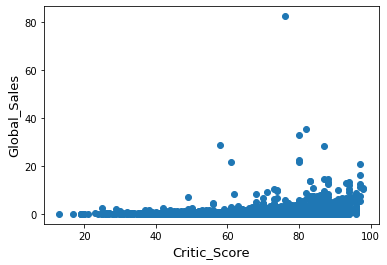

In [ ]:
#FINDING OUTLIERS
fig, ax = plt.subplots()
ax.scatter(x = data['Critic_Score'], y = data['Global_Sales'])
plt.ylabel('Global_Sales', fontsize=13)
plt.xlabel('Critic_Score', fontsize=13)
plt.show()

In [ ]:
data = data.drop(data[(data['Critic_Score']>60) & (data['Global_Sales']>60)].index)

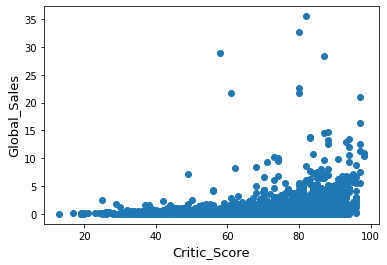

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = data['Critic_Score'], y = data['Global_Sales'])
plt.ylabel('Global_Sales', fontsize=13)
plt.xlabel('Critic_Score', fontsize=13)
plt.show()

In [ ]:

X = data[['Year_of_Release', 'Critic_Score', 'Critic_Count',
       'User_Score', 'User_Count', 'Platform_PC', 'Platform_PS3',
       'Platform_PS4', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360',
       'Platform_XOne', 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting',
       'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing',
       'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation',
       'Genre_Sports', 'Genre_Strategy', 'Rating_E', 'Rating_E10+', 'Rating_M',
       'Rating_RP', 'Rating_T']]

Y = data[['Global_Sales']]

#Double checking the shape
print(X.shape)
print(Y.shape)
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)


(4320, 29)
(4320, 1)


,Missing Ratio


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

#Let's check the shape of the split data as a precaution
print("X_train shape: {}".format(X_train.shape))
print("Y_train shape: {}".format(Y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("Y_test shape: {}".format(Y_test.shape))

X_train shape: (3240, 29)
Y_train shape: (3240, 1)
X_test shape: (1080, 29)
Y_test shape: (1080, 1)


In [ ]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
Y_train = np.log1p(Y_train)
Y_test = np.log1p(Y_test)

In [ ]:
##LINEAR REGRESSION

from sklearn.linear_model import LinearRegression

#R2-SCORE
regr = LinearRegression()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))

R-squared = 0.4308
Root mean squared error = 0.3565


In [ ]:
##DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

#R2-SCORE
regr = DecisionTreeRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))


R-squared = 0.3327
Root mean squared error = 0.3860


In [ ]:
##RIDGE

from sklearn.linear_model import Ridge


#R2-SCORE
regr = Ridge()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))



R-squared = 0.4314
Root mean squared error = 0.3563


In [ ]:
##SVR

from sklearn.svm import SVR

#R2-SCORE
regr = SVR()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))


R-squared = 0.1948
Root mean squared error = 0.4240


In [ ]:
##KNeighbors
from sklearn.neighbors import KNeighborsRegressor

#R2-SCORE
regr = KNeighborsRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))



R-squared = 0.3004
Root mean squared error = 0.3953


In [ ]:
##ADABoost
from sklearn.ensemble import AdaBoostRegressor

#R2-SCORE
regr = AdaBoostRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))


R-squared = 0.3308
Root mean squared error = 0.3866


In [ ]:
##GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor


#R2-SCORE
regr = GradientBoostingRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))



R-squared = 0.6406
Root mean squared error = 0.2833


In [ ]:
##RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#R2-SCORE
regr = RandomForestRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))


R-squared = 0.6617
Root mean squared error = 0.2749


HANDLING NOISY DATA

Min-Max Normalization

In [ ]:
data = pd.read_csv("/content/Video_Games_Sales_as_at_22_Dec_2016.csv")

# Examine the data types of every variable

data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data = data[(data['Platform'] == 'PS3') | (data['Platform'] == 'PS4') | (data['Platform'] == 'X360') | (data['Platform'] == 'XOne') | (data['Platform'] == 'Wii') | (data['Platform'] == 'WiiU') | (data['Platform'] == 'PC')]

#Let's double check the value counts to be sure
print(pd.value_counts(data["Platform"]))

#Let's see the shape of the data again
print(data.shape)

#Lets see the missing ratios again
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)


PS3     1331
Wii     1320
X360    1262
PC       974
PS4      393
XOne     247
WiiU     147
Name: Platform, dtype: int64
(5674, 16)


,Missing Ratio
Critic_Count,37.486782
Critic_Score,37.486782
User_Count,34.578780
Rating,23.757490
User_Score,22.559041
Developer,21.713077
Year_of_Release,1.868171
Publisher,0.229115


In [ ]:

#filling all Nas with mean
data['Year_of_Release'] = data['Year_of_Release'].fillna(data['Year_of_Release'].mean())
data['Critic_Count'] = data['Critic_Count'].fillna(data['Critic_Count'].mean())
data['Critic_Score'] = data['Critic_Score'].fillna(data['Critic_Score'].mean())



data['User_Score'] = data['User_Score'].replace('tbd', None)
data['User_Score'] = data['User_Score'].astype(float)
data['User_Score'] = data['User_Score'].fillna(data['User_Score'].mean())
data['User_Score'] = data['User_Score'].astype(int)
data['User_Count'] = data['User_Count'].fillna(data['User_Count'].mean())

data = data.dropna(subset=['Publisher','Developer','Rating'])

In [ ]:
print(data.shape) #pre-dummies shape
data = pd.get_dummies(data=data, columns=['Platform', 'Genre', 'Rating'])
print(data.shape) #post-dummies shape
data.head #Check to verify that dummies are ok


(4321, 16)
(4321, 39)


<bound method NDFrame.head of                                     Name  Year_of_Release  ... Rating_RP  Rating_T
0                             Wii Sports           2006.0  ...         0         0
2                         Mario Kart Wii           2008.0  ...         0         0
3                      Wii Sports Resort           2009.0  ...         0         0
7                               Wii Play           2006.0  ...         0         0
8              New Super Mario Bros. Wii           2009.0  ...         0         0
...                                  ...              ...  ...       ...       ...
16682                     End of Nations           2012.0  ...         0         1
16685                            Worms 2           1997.0  ...         0         0
16696  Metal Gear Solid V: Ground Zeroes           2014.0  ...         0         0
16700                             Breach           2011.0  ...         0         1
16706            STORM: Frontline Nation           2011.0

In [ ]:
data = data.drop(['Name', 'Publisher', 'Developer', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)



In [ ]:
X = data[['Year_of_Release', 'Critic_Score', 'Critic_Count',
       'User_Score', 'User_Count', 'Platform_PC', 'Platform_PS3',
       'Platform_PS4', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360',
       'Platform_XOne', 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting',
       'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing',
       'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation',
       'Genre_Sports', 'Genre_Strategy', 'Rating_E', 'Rating_E10+', 'Rating_M',
       'Rating_RP', 'Rating_T']]

Y = data[['Global_Sales']]

#Double checking the shape
print(X.shape)
print(Y.shape)

(4321, 29)
(4321, 1)


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)
norm=MinMaxScaler().fit(X_train)
X_train=norm.transform(X_train)
X_test=norm.transform(X_test)

#Let's check the shape of the split data as a precaution
print("X_train shape: {}".format(X_train.shape))
print("Y_train shape: {}".format(Y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("Y_test shape: {}".format(Y_test.shape))
print(X_train)


X_train shape: (3240, 29)
Y_train shape: (3240, 1)
X_test shape: (1081, 29)
Y_test shape: (1081, 1)
[[0.77419355 0.67139422 0.26905964 ... 0.         0.         0.        ]
 [0.80645161 0.15294118 0.11818182 ... 0.         0.         0.        ]
 [0.93548387 0.74117647 0.25454545 ... 0.         0.         1.        ]
 ...
 [0.77419355 0.67139422 0.26905964 ... 0.         0.         0.        ]
 [0.80645161 0.4        0.01818182 ... 1.         0.         0.        ]
 [0.93548387 0.67139422 0.26905964 ... 1.         0.         0.        ]]


In [ ]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
Y_train = np.log1p(Y_train)
Y_test = np.log1p(Y_test)

In [ ]:

##LINEAR REGRESSION

from sklearn.linear_model import LinearRegression

#R2-SCORE
regr = LinearRegression()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))



R-squared = 0.3671
Root mean squared error = 0.3770


In [ ]:
##DecissionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

#R2-SCORE
regr = DecisionTreeRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))


R-squared = 0.1942
Root mean squared error = 0.4254


In [ ]:
##RIDGE

from sklearn.linear_model import Ridge


#R2-SCORE
regr = Ridge()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))



R-squared = 0.3667
Root mean squared error = 0.3771


In [ ]:
##SVR

from sklearn.svm import SVR

#R2-SCORE
regr = SVR()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))



R-squared = 0.4130
Root mean squared error = 0.3631


In [ ]:
##KNeighbors
from sklearn.neighbors import KNeighborsRegressor

#R2-SCORE
regr = KNeighborsRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))



R-squared = 0.3310
Root mean squared error = 0.3876


In [ ]:
##ADABoost
from sklearn.ensemble import AdaBoostRegressor

#R2-SCORE
regr = AdaBoostRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))


R-squared = 0.2329
Root mean squared error = 0.4150


In [ ]:
##GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor


#R2-SCORE
regr = GradientBoostingRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))



R-squared = 0.5490
Root mean squared error = 0.3182


In [ ]:

##RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#R2-SCORE
regr = RandomForestRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))


R-squared = 0.5732
Root mean squared error = 0.3096


In [ ]:
##XGB
import xgboost as xgb

#R2-SCORE
regr = xgb.XGBRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))


[07:14:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R-squared = 0.5504
Root mean squared error = 0.3177


STANDARDIZATION

In [ ]:
data = pd.read_csv("/content/Video_Games_Sales_as_at_22_Dec_2016.csv")

# Examine the data types of every variable

data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data = data[(data['Platform'] == 'PS3') | (data['Platform'] == 'PS4') | (data['Platform'] == 'X360') | (data['Platform'] == 'XOne') | (data['Platform'] == 'Wii') | (data['Platform'] == 'WiiU') | (data['Platform'] == 'PC')]

#Let's double check the value counts to be sure
print(pd.value_counts(data["Platform"]))

#Let's see the shape of the data again
print(data.shape)

#Lets see the missing ratios again
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)


PS3     1331
Wii     1320
X360    1262
PC       974
PS4      393
XOne     247
WiiU     147
Name: Platform, dtype: int64
(5674, 16)


,Missing Ratio
Critic_Count,37.486782
Critic_Score,37.486782
User_Count,34.578780
Rating,23.757490
User_Score,22.559041
Developer,21.713077
Year_of_Release,1.868171
Publisher,0.229115


In [ ]:

#filling all Nas with mean
data['Year_of_Release'] = data['Year_of_Release'].fillna(data['Year_of_Release'].mean())
data['Critic_Count'] = data['Critic_Count'].fillna(data['Critic_Count'].mean())
data['Critic_Score'] = data['Critic_Score'].fillna(data['Critic_Score'].mean())



data['User_Score'] = data['User_Score'].replace('tbd', None)
data['User_Score'] = data['User_Score'].astype(float)
data['User_Score'] = data['User_Score'].fillna(data['User_Score'].mean())
data['User_Score'] = data['User_Score'].astype(int)
data['User_Count'] = data['User_Count'].fillna(data['User_Count'].mean())

data = data.dropna(subset=['Publisher','Developer','Rating'])

In [ ]:
print(data.shape) #pre-dummies shape
data = pd.get_dummies(data=data, columns=['Platform', 'Genre', 'Rating'])
print(data.shape) #post-dummies shape
data.head #Check to verify that dummies are ok


(4321, 16)
(4321, 39)


<bound method NDFrame.head of                                     Name  Year_of_Release  ... Rating_RP  Rating_T
0                             Wii Sports           2006.0  ...         0         0
2                         Mario Kart Wii           2008.0  ...         0         0
3                      Wii Sports Resort           2009.0  ...         0         0
7                               Wii Play           2006.0  ...         0         0
8              New Super Mario Bros. Wii           2009.0  ...         0         0
...                                  ...              ...  ...       ...       ...
16682                     End of Nations           2012.0  ...         0         1
16685                            Worms 2           1997.0  ...         0         0
16696  Metal Gear Solid V: Ground Zeroes           2014.0  ...         0         0
16700                             Breach           2011.0  ...         0         1
16706            STORM: Frontline Nation           2011.0

In [ ]:
data = data.drop(['Name', 'Publisher', 'Developer', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)



In [ ]:
X = data[['Year_of_Release', 'Critic_Score', 'Critic_Count',
       'User_Score', 'User_Count', 'Platform_PC', 'Platform_PS3',
       'Platform_PS4', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360',
       'Platform_XOne', 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting',
       'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing',
       'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation',
       'Genre_Sports', 'Genre_Strategy', 'Rating_E', 'Rating_E10+', 'Rating_M',
       'Rating_RP', 'Rating_T']]

Y = data[['Global_Sales']]

#Double checking the shape
print(X.shape)
print(Y.shape)

(4321, 29)
(4321, 1)


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)
#Let's check the shape of the split data as a precaution
print("X_train shape: {}".format(X_train.shape))
print("Y_train shape: {}".format(Y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("Y_test shape: {}".format(Y_test.shape))
print(X_train)


X_train shape: (3240, 29)
Y_train shape: (3240, 1)
X_test shape: (1081, 29)
Y_test shape: (1081, 1)
       Year_of_Release  Critic_Score  ...  Rating_RP  Rating_T
9691            2009.0     70.068509  ...          0         0
5539            2010.0     26.000000  ...          0         0
6796            2014.0     76.000000  ...          0         1
2852            2011.0     84.000000  ...          0         0
4408            2008.0     68.000000  ...          0         0
...                ...           ...  ...        ...       ...
12197           2010.0     70.068509  ...          0         0
1183            2014.0     80.000000  ...          0         0
10438           2009.0     70.068509  ...          0         0
13887           2010.0     47.000000  ...          0         0
2297            2014.0     70.068509  ...          0         0

[3240 rows x 29 columns]


In [ ]:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


print(X_train)

[[-3.71570664e-01  4.62378820e-03  1.64286414e-03 ... -5.46440477e-01
  -2.48528716e-02 -6.60913834e-01]
 [-6.21068456e-02 -3.39269403e+00 -8.49046812e-01 ... -5.46440477e-01
  -2.48528716e-02 -6.60913834e-01]
 [ 1.17574843e+00  4.61892755e-01 -8.01920145e-02 ... -5.46440477e-01
  -2.48528716e-02  1.51305654e+00]
 ...
 [-3.71570664e-01  4.62378820e-03  1.64286414e-03 ... -5.46440477e-01
  -2.48528716e-02 -6.60913834e-01]
 [-6.21068456e-02 -1.77376758e+00 -1.41287366e+00 ...  1.83002549e+00
  -2.48528716e-02 -6.60913834e-01]
 [ 1.17574843e+00  4.62378820e-03  1.64286414e-03 ...  1.83002549e+00
  -2.48528716e-02 -6.60913834e-01]]


In [ ]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
Y_train = np.log1p(Y_train)
Y_test = np.log1p(Y_test)

In [ ]:

##LINEAR REGRESSION

from sklearn.linear_model import LinearRegression

#R2-SCORE
regr = LinearRegression()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))



R-squared = 0.3669
Root mean squared error = 0.3770


In [ ]:
##DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

#R2-SCORE
regr = DecisionTreeRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))


R-squared = 0.2294
Root mean squared error = 0.4160


In [ ]:
##RIDGE

from sklearn.linear_model import Ridge


#R2-SCORE
regr = Ridge()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))



R-squared = 0.3671
Root mean squared error = 0.3770


In [ ]:
##SVR

from sklearn.svm import SVR

#R2-SCORE
regr = SVR()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))



R-squared = 0.4997
Root mean squared error = 0.3352


In [ ]:
##KNeighbors
from sklearn.neighbors import KNeighborsRegressor

#R2-SCORE
regr = KNeighborsRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))



R-squared = 0.3940
Root mean squared error = 0.3689


In [ ]:
##ADABoost
from sklearn.ensemble import AdaBoostRegressor

#R2-SCORE
regr = AdaBoostRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))


R-squared = 0.2129
Root mean squared error = 0.4204


In [ ]:
##GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor


#R2-SCORE
regr = GradientBoostingRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))



R-squared = 0.5494
Root mean squared error = 0.3181


In [ ]:
##RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#R2-SCORE
regr = RandomForestRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))


R-squared = 0.5679
Root mean squared error = 0.3115


In [ ]:
##XGB
import xgboost as xgb

#R2-SCORE
regr = xgb.XGBRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))


[07:14:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R-squared = 0.5504
Root mean squared error = 0.3177


TRYING ALL ALGORITHMS USING SUITABLE COMBINATION OF PREPROCESSING TECHNIQUES



In [ ]:
data = pd.read_csv("/content/Video_Games_Sales_as_at_22_Dec_2016.csv")

In [ ]:
# Examine the data types of every variable

data.head()
#remove outliers
data = data.drop(data[(data['Critic_Score']>60) & (data['Global_Sales']>60)].index)

data = data[(data['Platform'] == 'PS3') | (data['Platform'] == 'PS4') | (data['Platform'] == 'X360') | (data['Platform'] == 'XOne') | (data['Platform'] == 'Wii') | (data['Platform'] == 'WiiU') | (data['Platform'] == 'PC')]
#Let's double check the value counts to be sure
print(pd.value_counts(data["Platform"]))

#Let's see the shape of the data again
print(data.shape)

#Lets see the missing ratios again
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)


PS3     1331
Wii     1319
X360    1262
PC       974
PS4      393
XOne     247
WiiU     147
Name: Platform, dtype: int64
(5673, 16)


,Missing Ratio
Critic_Count,37.493390
Critic_Score,37.493390
User_Count,34.584876
Rating,23.761678
User_Score,22.563018
Developer,21.716905
Year_of_Release,1.868500
Publisher,0.229156


In [ ]:
#Crtic_score is an important feature but is missing almost 40% of data thus we are dropping the na rows of this column
data = data.dropna(subset=['Critic_Score'])

#Lets see the missing ratios again
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

,Missing Ratio
User_Count,5.019741
Rating,2.002256
Year_of_Release,2.002256
User_Score,0.564016
Developer,0.084602
Publisher,0.084602


In [ ]:
data['Publisher'] = data['Publisher'].fillna(data['Publisher'].mode()[0])
data['Developer'] = data['Developer'].fillna(data['Developer'].mode()[0])
data['Rating'] = data['Rating'].fillna(data['Rating'].mode()[0])
data['Year_of_Release'] = data['Year_of_Release'].fillna(data['Year_of_Release'].median())
#There's "tbd" values in the mix here which we need to handle first
data['User_Score'] = data['User_Score'].replace('tbd', None)
#Now we can handle the N/A's appropriately
data['User_Score'] = data['User_Score'].fillna(data['User_Score'].median())

data['User_Count'] = data['User_Count'].fillna(data['User_Count'].median())
#Lets see the missing ratios again
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

,Missing Ratio


In [ ]:
#HADLING CATEGORICAL VALUES 
#ONE HOT ENCODING
print(data.shape) #pre-dummies shape
data = pd.get_dummies(data=data, columns=['Platform', 'Genre', 'Rating'])
print(data.shape) #post-dummies shape
data.head #Check to verify that dummies are ok

(3546, 16)
(3546, 37)


<bound method NDFrame.head of                                     Name  Year_of_Release  ... Rating_RP  Rating_T
2                         Mario Kart Wii           2008.0  ...         0         0
3                      Wii Sports Resort           2009.0  ...         0         0
7                               Wii Play           2006.0  ...         0         0
8              New Super Mario Bros. Wii           2009.0  ...         0         0
13                               Wii Fit           2007.0  ...         0         0
...                                  ...              ...  ...       ...       ...
16664                   Prison Architect           2016.0  ...         0         1
16696  Metal Gear Solid V: Ground Zeroes           2014.0  ...         0         0
16700                             Breach           2011.0  ...         0         1
16706            STORM: Frontline Nation           2011.0  ...         0         0
16709                            15 Days           2009.0

In [ ]:
#Dropping unwanted columns
data = data.drop(['Name', 'Publisher', 'Developer', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)

In [ ]:
X = data[['Year_of_Release', 'Critic_Score', 'Critic_Count',
       'User_Score', 'User_Count', 'Platform_PC', 'Platform_PS3',
       'Platform_PS4', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360',
       'Platform_XOne', 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting',
       'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing',
       'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation',
       'Genre_Sports', 'Genre_Strategy', 'Rating_E', 'Rating_E10+', 'Rating_M',
       'Rating_RP', 'Rating_T']]

Y = data[['Global_Sales']]

#Double checking the shape
print(X.shape)
print(Y.shape)

(3546, 29)
(3546, 1)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.25, random_state=42)

#Let's check the shape of the split data as a precaution
print("X_train shape: {}".format(X_train.shape))
print("Y_train shape: {}".format(Y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("Y_test shape: {}".format(Y_test.shape))

X_train shape: (2659, 29)
Y_train shape: (2659, 1)
X_test shape: (887, 29)
Y_test shape: (887, 1)


In [ ]:
#Handling Abnormal distribution
Y_train = np.log1p(Y_train)
Y_test = np.log1p(Y_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

In [ ]:

##LINEAR REGRESSION

from sklearn.linear_model import LinearRegression

#R2-SCORE
regr = LinearRegression()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))



R-squared = 0.4919
Root mean squared error = 0.3610


In [ ]:
##DecissionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

#R2-SCORE
regr = DecisionTreeRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))


R-squared = 0.3971
Root mean squared error = 0.3933


In [ ]:
##RIDGE

from sklearn.linear_model import Ridge


#R2-SCORE
regr = Ridge()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))



R-squared = 0.4872
Root mean squared error = 0.3627


In [ ]:
##SVR

from sklearn.svm import SVR

#R2-SCORE
regr = SVR()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))



R-squared = 0.5267
Root mean squared error = 0.3484


In [ ]:
##KNeighbors
from sklearn.neighbors import KNeighborsRegressor

#R2-SCORE
regr = KNeighborsRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))



R-squared = 0.4341
Root mean squared error = 0.3810


In [ ]:
##ADABoost
from sklearn.ensemble import AdaBoostRegressor

#R2-SCORE
regr = AdaBoostRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))


R-squared = 0.4180
Root mean squared error = 0.3864


In [ ]:
##GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor


#R2-SCORE
regr = GradientBoostingRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))



R-squared = 0.6260
Root mean squared error = 0.3098


In [ ]:
##RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#R2-SCORE
regr = RandomForestRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))


R-squared = 0.6320
Root mean squared error = 0.3073


In [ ]:
##XGB
import xgboost as xgb

#R2-SCORE
regr = xgb.XGBRegressor()
regr.fit(X_train, Y_train)
y_pred_test = regr.predict(X_test)
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))
#RMSE
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))


[07:14:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R-squared = 0.6151
Root mean squared error = 0.3143
